In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

from get_spectrum import imread_gs, image_to_spectrum, remove_bckg, calibrate_from_reference

In [2]:
gaussian = lambda x, a, m, s: a*np.exp(-(x-m)**2/s**2/2)

def spec(i, signal_loc=None):
    signal_loc, f0_s = image_to_spectrum(imread_gs(f'data/20240314/Im01_2024-03-14-164532-{i:04}.tif'), signal_loc)
    return np.array(range(signal_loc, -1, -1)), remove_bckg(f0_s, 20, 10, 80)


def spec_avg(i, n, signal_loc=None):
    im1 = imread_gs(f'data/20240314/Im01_2024-03-14-164532-{i:04}.tif')
    img = np.empty((n, *im1.shape), dtype=np.float64)
    img[0] = im1
    for j in range(1, n):
        img[j] = imread_gs(f'data/20240314/Im01_2024-03-14-164532-{i+j:04}.tif')
    img = img.mean(axis=0)
    
    signal_loc, f0_s = image_to_spectrum(img, signal_loc)
    return np.array(range(signal_loc, -1, -1)), remove_bckg(f0_s, 20, 10, 80)
    

def remove_hot_px(s, f, pxs):
    mask = np.ones_like(s, dtype=bool)
    mask[pxs] = False

    return s[::-1][mask][::-1], f[::-1][mask][::-1]


def cut(s, f, px_min, px_max):
    mask = np.zeros_like(s, dtype=bool)
    mask[px_min:px_max+1] = True

    return s[::-1][mask][::-1], f[::-1][mask][::-1]


def gfit(s, f):
    af = np.max(f)
    sf = len(f)/6
    mf = np.median(s)
    return curve_fit(gaussian, s, f, p0=(af, mf, sf))

In [3]:
P1_MIN, P1_MAX = 560, 600
P2_MIN, P2_MAX = 450, 495
HOT_PX = [464, 1670, 1579, 1314, 1354, 1389]
SIGNAL_LOC = 1796

In [4]:
s, f = remove_hot_px(*spec(0), HOT_PX)
s, f = cut(s, f, P1_MIN, P1_MAX)

a, b = gfit(s, f)
a, np.sqrt(np.diag(b))

(array([ 37.35214132, 583.4746828 ,   9.02411139]),
 array([2.7200765 , 0.75926429, 0.79514002]))

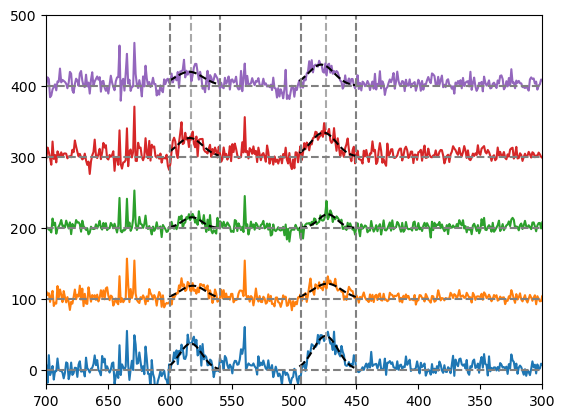

In [5]:
###
s, f = remove_hot_px(*spec(0, SIGNAL_LOC), HOT_PX)
plt.plot(s, f)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx), c='black', ls='--')
plt.axvline(xx[1], c='darkgray', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx), c='black', ls='--')
plt.axvline(xx[1], c='darkgray', ls='--')

###
s, f = remove_hot_px(*spec(100, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+100)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+100, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+100, c='black', ls='--')

###
s, f = remove_hot_px(*spec(200, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+200)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+200, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+200, c='black', ls='--')

###
s, f = remove_hot_px(*spec(300, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+300)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+300, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+300, c='black', ls='--')

###
s, f = remove_hot_px(*spec(400, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+400)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+400, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+400, c='black', ls='--')

# plt.gca().invert_xaxis()
plt.xlim(700, 300)
plt.ylim(-20, 500)
plt.axhline(0, c='gray', ls='--')
plt.axhline(100, c='gray', ls='--')
plt.axhline(200, c='gray', ls='--')
plt.axhline(300, c='gray', ls='--')
plt.axhline(400, c='gray', ls='--')
plt.axvline(600, c='gray', ls='--')
plt.axvline(560, c='gray', ls='--')
plt.axvline(495, c='gray', ls='--')
plt.axvline(450, c='gray', ls='--')

None

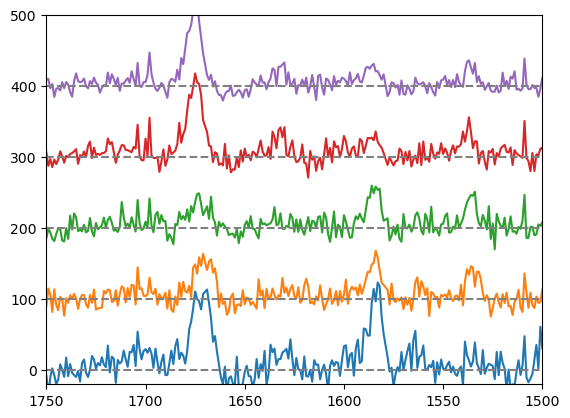

In [6]:
###
s, f = remove_hot_px(*spec(0, SIGNAL_LOC), HOT_PX)
plt.plot(s, f)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx), c='black', ls='--')
plt.axvline(xx[1], c='darkgray', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx), c='black', ls='--')
plt.axvline(xx[1], c='darkgray', ls='--')

###
s, f = remove_hot_px(*spec(100, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+100)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+100, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+100, c='black', ls='--')

###
s, f = remove_hot_px(*spec(200, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+200)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+200, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+200, c='black', ls='--')

###
s, f = remove_hot_px(*spec(300, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+300)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+300, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+300, c='black', ls='--')

###
s, f = remove_hot_px(*spec(400, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+400)
s1, f1 = cut(s, f, P1_MIN, P1_MAX)
xx = gfit(s1, f1)[0]
plt.plot(s1, gaussian(s1, *xx)+400, c='black', ls='--')

s2, f2 = cut(s, f, P2_MIN, P2_MAX)
xx = gfit(s2, f2)[0]
plt.plot(s2, gaussian(s2, *xx)+400, c='black', ls='--')

# plt.gca().invert_xaxis()
plt.xlim(1750, 1500)
plt.ylim(-20, 500)
plt.axhline(0, c='gray', ls='--')
plt.axhline(100, c='gray', ls='--')
plt.axhline(200, c='gray', ls='--')
plt.axhline(300, c='gray', ls='--')
plt.axhline(400, c='gray', ls='--')
plt.axvline(600, c='gray', ls='--')
plt.axvline(560, c='gray', ls='--')
plt.axvline(495, c='gray', ls='--')
plt.axvline(450, c='gray', ls='--')

None

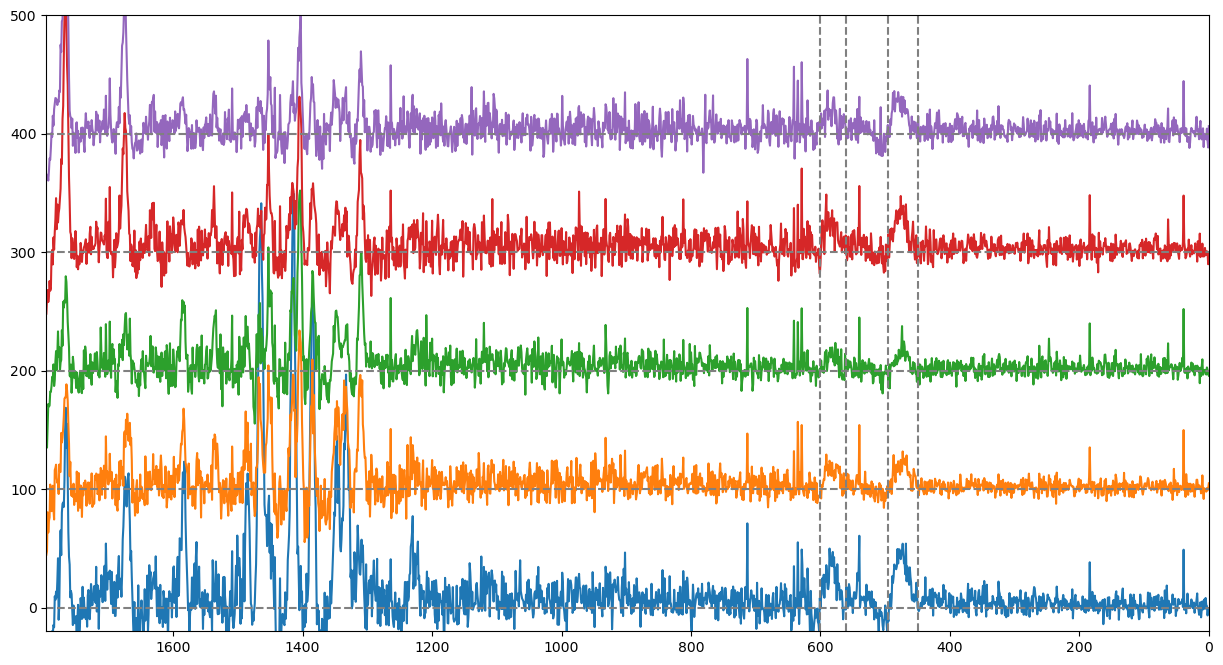

In [7]:
plt.figure(figsize=(15, 8))
###
s, f = remove_hot_px(*spec(0, SIGNAL_LOC), HOT_PX)
plt.plot(s, f)

###
s, f = remove_hot_px(*spec(100, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+100)

###
s, f = remove_hot_px(*spec(200, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+200)

###
s, f = remove_hot_px(*spec(300, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+300)

###
s, f = remove_hot_px(*spec(400, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+400)

# plt.gca().invert_xaxis()
plt.xlim(SIGNAL_LOC, 0)
plt.ylim(-20, 500)
plt.axhline(0, c='gray', ls='--')
plt.axhline(100, c='gray', ls='--')
plt.axhline(200, c='gray', ls='--')
plt.axhline(300, c='gray', ls='--')
plt.axhline(400, c='gray', ls='--')
plt.axvline(600, c='gray', ls='--')
plt.axvline(560, c='gray', ls='--')
plt.axvline(495, c='gray', ls='--')
plt.axvline(450, c='gray', ls='--')

None

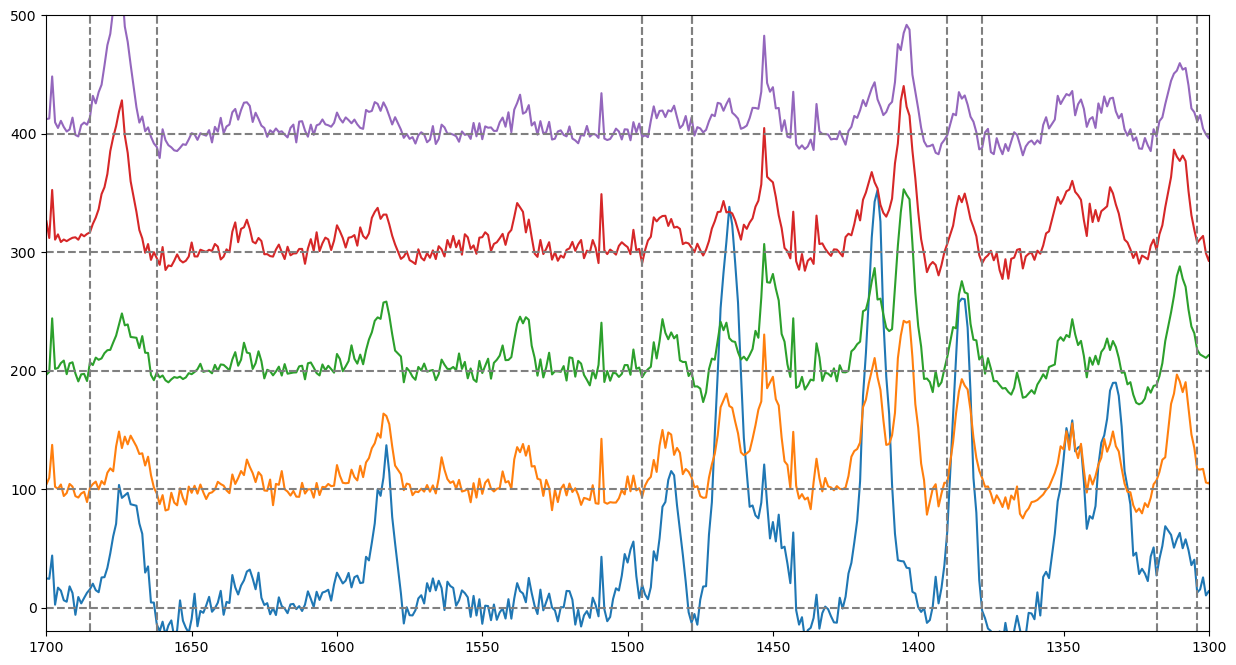

In [11]:
plt.figure(figsize=(15, 8))
###
s, f = remove_hot_px(*spec_avg(0, 5, SIGNAL_LOC), HOT_PX)
plt.plot(s, f)

###
s, f = remove_hot_px(*spec_avg(100, 5, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+100)

###
s, f = remove_hot_px(*spec_avg(200, 5, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+200)

###
s, f = remove_hot_px(*spec_avg(300, 5, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+300)

###
s, f = remove_hot_px(*spec_avg(400, 5, SIGNAL_LOC), HOT_PX)
plt.plot(s, f+400)

# plt.gca().invert_xaxis()
plt.xlim(SIGNAL_LOC, 0)
plt.ylim(-20, 500)
plt.axhline(0, c='gray', ls='--')
plt.axhline(100, c='gray', ls='--')
plt.axhline(200, c='gray', ls='--')
plt.axhline(300, c='gray', ls='--')
plt.axhline(400, c='gray', ls='--')
plt.axvline(600, c='gray', ls='--')
plt.axvline(560, c='gray', ls='--')
plt.axvline(495, c='gray', ls='--')
plt.axvline(450, c='gray', ls='--')

C1_MIN, C1_MAX = 1662, 1685
plt.axvline(C1_MIN, c='gray', ls='--')
plt.axvline(C1_MAX, c='gray', ls='--')
# C2_MIN, C2_MAX = 1578, 1591
# plt.axvline(C2_MIN, c='gray', ls='--')
# plt.axvline(C2_MAX, c='gray', ls='--')
C3_MIN, C3_MAX = 1478, 1495
plt.axvline(C3_MIN, c='gray', ls='--')
plt.axvline(C3_MAX, c='gray', ls='--')
C4_MIN, C4_MAX = 1478, 1495
plt.axvline(C4_MIN, c='gray', ls='--')
plt.axvline(C4_MAX, c='gray', ls='--')
C5_MIN, C5_MAX = 1378, 1390
plt.axvline(C5_MIN, c='gray', ls='--')
plt.axvline(C5_MAX, c='gray', ls='--')
C6_MIN, C6_MAX = 1304, 1318
plt.axvline(C6_MIN, c='gray', ls='--')
plt.axvline(C6_MAX, c='gray', ls='--')

plt.xlim(1700, 1300)

None

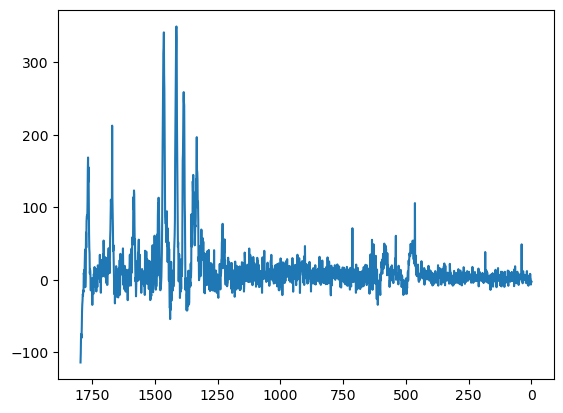

In [9]:
plt.plot(*spec(0))
plt.gca().invert_xaxis()

In [10]:
def peak_pos(i, hot_px, pmin, pmax):
    popt, pcov = gfit(*cut(*remove_hot_px(*spec(i), hot_px), pmin, pmax))
    return popt[1], np.sqrt(pcov[1][1])


def peak_pos_avg(i, n, hot_px, pmin, pmax):
    popt, pcov = gfit(*cut(*remove_hot_px(*spec_avg(i, n, SIGNAL_LOC), hot_px), pmin, pmax))
    return popt[1], np.sqrt(pcov[1][1])

In [81]:
LEN = 465
p1_loc, p1_err = np.empty(LEN), np.empty(LEN)
p2_loc, p2_err = np.empty(LEN), np.empty(LEN)
c1_loc, c1_err = np.empty(LEN), np.empty(LEN)
c2_loc, c2_err = np.empty(LEN), np.empty(LEN)
c3_loc, c3_err = np.empty(LEN), np.empty(LEN)
c4_loc, c4_err = np.empty(LEN), np.empty(LEN)
c5_loc, c5_err = np.empty(LEN), np.empty(LEN)
c6_loc, c6_err = np.empty(LEN), np.empty(LEN)
for i in range(LEN):
    p1_loc[i], p1_err[i] = peak_pos(i, HOT_PX, P1_MIN, P1_MAX)
    p2_loc[i], p2_err[i] = peak_pos(i, HOT_PX, P2_MIN, P2_MAX)
    # c1_loc[i], c1_err[i] = peak_pos(i, HOT_PX, C1_MIN, C1_MAX)
    # c2_loc[i], c2_err[i] = peak_pos(i, HOT_PX, C2_MIN, C2_MAX)
    # c3_loc[i], c3_err[i] = peak_pos(i, HOT_PX, C3_MIN, C3_MAX)
    # c4_loc[i], c4_err[i] = peak_pos(i, HOT_PX, C4_MIN, C4_MAX)
    # c5_loc[i], c5_err[i] = peak_pos(i, HOT_PX, C5_MIN, C5_MAX)
    # c6_loc[i], c6_err[i] = peak_pos(i, HOT_PX, C6_MIN, C6_MAX)

KeyboardInterrupt: 

In [13]:
N = 5
LEN = 465
p1_loc_avg, p1_err_avg = np.empty(LEN//N), np.empty(LEN//N)
p2_loc_avg, p2_err_avg = np.empty(LEN//N), np.empty(LEN//N)

for i in range(LEN//N):
    p1_loc_avg[i] = np.mean(p1_loc[N*i:N*(i+1)])
    p1_err_avg[i] = np.sqrt(np.sum(p1_err[N*i:N*(i+1)]**2)/N)
    p2_loc_avg[i] = np.mean(p2_loc[N*i:N*(i+1)])
    p2_err_avg[i] = np.sqrt(np.sum(p2_err[N*i:N*(i+1)]**2)/N)

NameError: name 'p1_loc' is not defined

In [14]:
N = 5
LEN = 465
p1_avg_loc, p1_avg_err = np.empty(LEN//N), np.empty(LEN//N)
p2_avg_loc, p2_avg_err = np.empty(LEN//N), np.empty(LEN//N)
c1_avg_loc, c1_avg_err = np.empty(LEN//N), np.empty(LEN//N)
# c2_avg_loc, c2_avg_err = np.empty(LEN//N), np.empty(LEN//N)
c3_avg_loc, c3_avg_err = np.empty(LEN//N), np.empty(LEN//N)
c4_avg_loc, c4_avg_err = np.empty(LEN//N), np.empty(LEN//N)
c5_avg_loc, c5_avg_err = np.empty(LEN//N), np.empty(LEN//N)
c6_avg_loc, c6_avg_err = np.empty(LEN//N), np.empty(LEN//N)

for i in range(LEN//N):
    p1_avg_loc[i], p1_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, P1_MIN, P1_MAX)
    p2_avg_loc[i], p2_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, P2_MIN, P2_MAX)
    c1_avg_loc[i], c1_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C1_MIN, C1_MAX)
    # c2_avg_loc[i], c2_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C2_MIN, C2_MAX)
    c3_avg_loc[i], c3_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C3_MIN, C3_MAX)
    c4_avg_loc[i], c4_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C4_MIN, C4_MAX)
    c5_avg_loc[i], c5_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C5_MIN, C5_MAX)
    c6_avg_loc[i], c6_avg_err[i] = peak_pos_avg(N*i, N, HOT_PX, C6_MIN, C6_MAX)

Text(0.5, 0, 'time [s]')

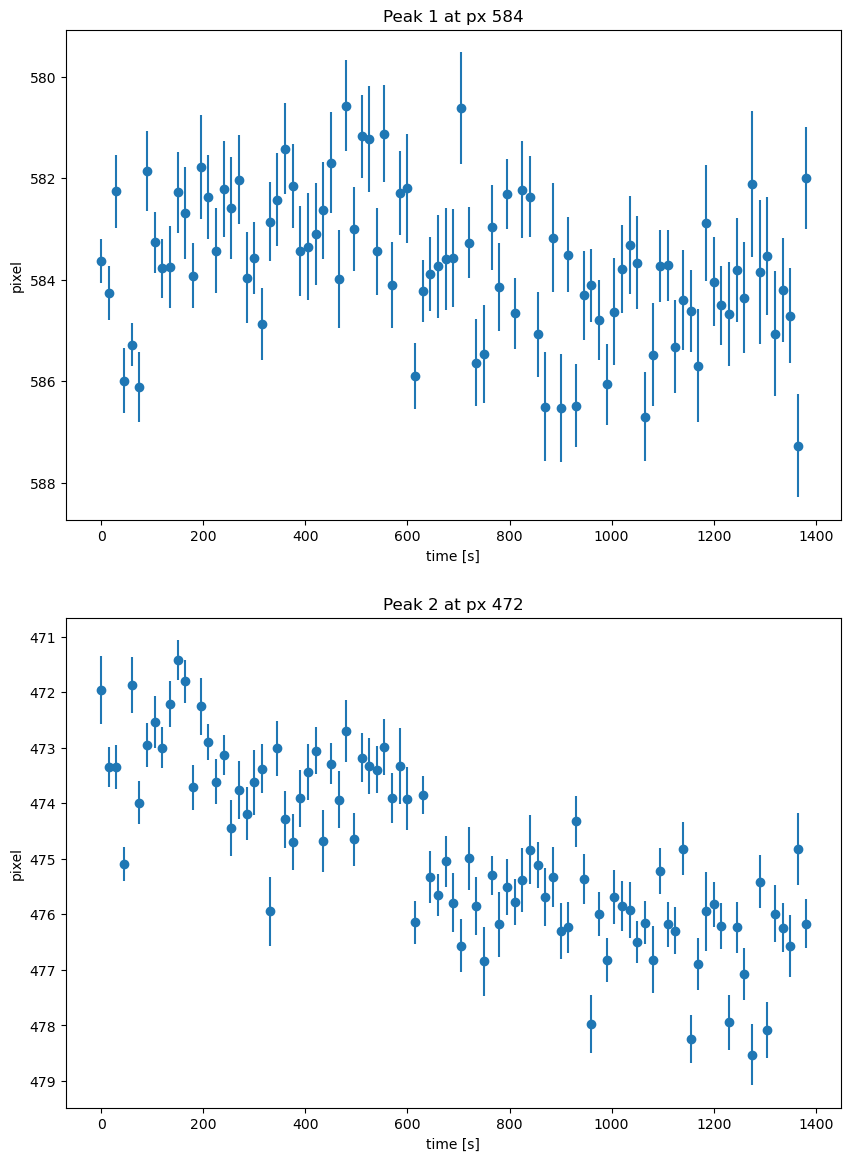

In [26]:
fig, ax = plt.subplots(2, figsize=(10, 14))
ax[0].errorbar(range(0, LEN*3, 3*N), p1_avg_loc, p1_avg_err, fmt='o')
ax[0].invert_yaxis()
ax[0].set_title('Peak 1 at px 584')
ax[0].set_ylabel('pixel')
ax[0].set_xlabel('time [s]')
ax[1].errorbar(range(0, LEN*3, 3*N), p2_avg_loc, p2_avg_err, fmt='o')
ax[1].invert_yaxis()
ax[1].set_title('Peak 2 at px 472')
ax[1].set_ylabel('pixel')
ax[1].set_xlabel('time [s]')

Text(0.5, 0, 'time [s]')

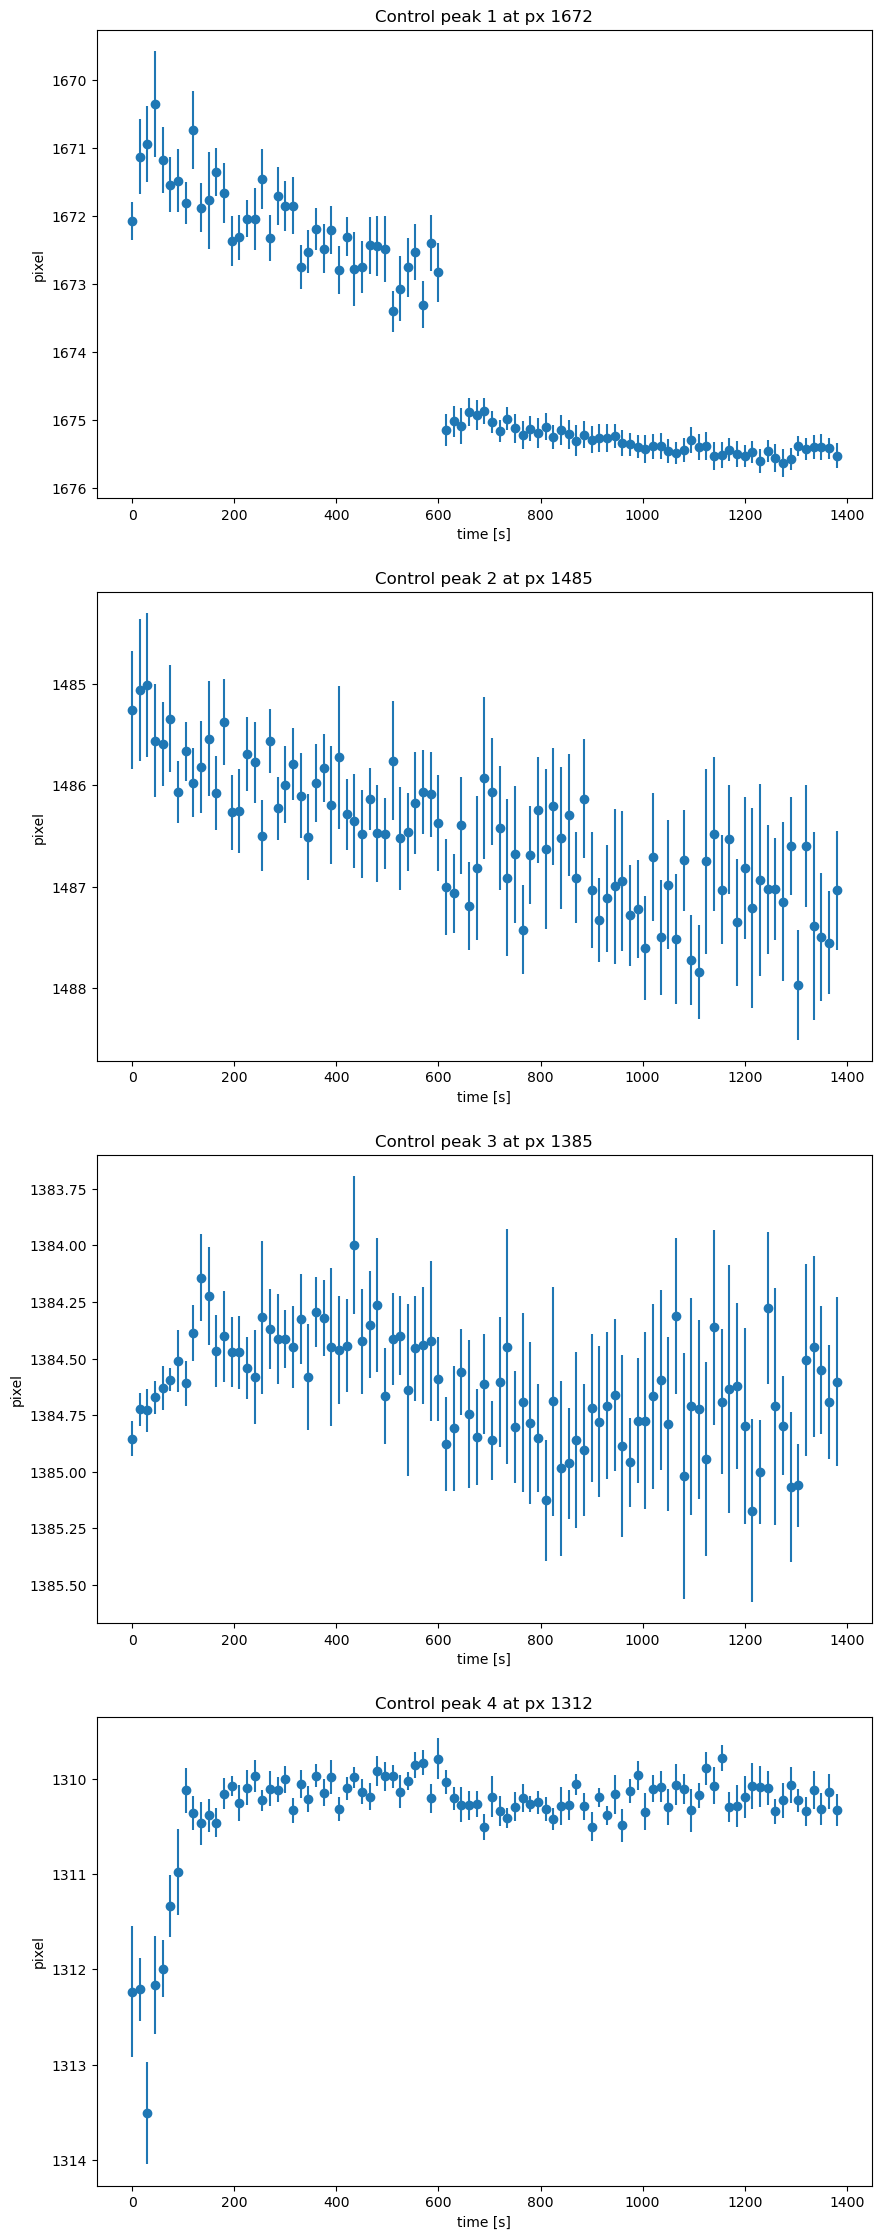

In [32]:
fig, ax = plt.subplots(4, figsize=(10, 28))
ax[0].errorbar(range(0, LEN*3, 3*N), c1_avg_loc, c1_avg_err, fmt='o')
ax[0].invert_yaxis()
ax[0].set_title('Control peak 1 at px 1672')
ax[0].set_ylabel('pixel')
ax[0].set_xlabel('time [s]')
ax[1].errorbar(range(0, LEN*3, 3*N), c3_avg_loc, c3_avg_err, fmt='o')
ax[1].invert_yaxis()
ax[1].set_title('Control peak 2 at px 1485')
ax[1].set_ylabel('pixel')
ax[1].set_xlabel('time [s]')
ax[2].errorbar(range(0, LEN*3, 3*N), c5_avg_loc, c5_avg_err, fmt='o')
ax[2].invert_yaxis()
ax[2].set_title('Control peak 3 at px 1385')
ax[2].set_ylabel('pixel')
ax[2].set_xlabel('time [s]')
ax[3].errorbar(range(0, LEN*3, 3*N), c6_avg_loc, c6_avg_err, fmt='o')
ax[3].invert_yaxis()
ax[3].set_title('Control peak 4 at px 1312')
ax[3].set_ylabel('pixel')
ax[3].set_xlabel('time [s]')


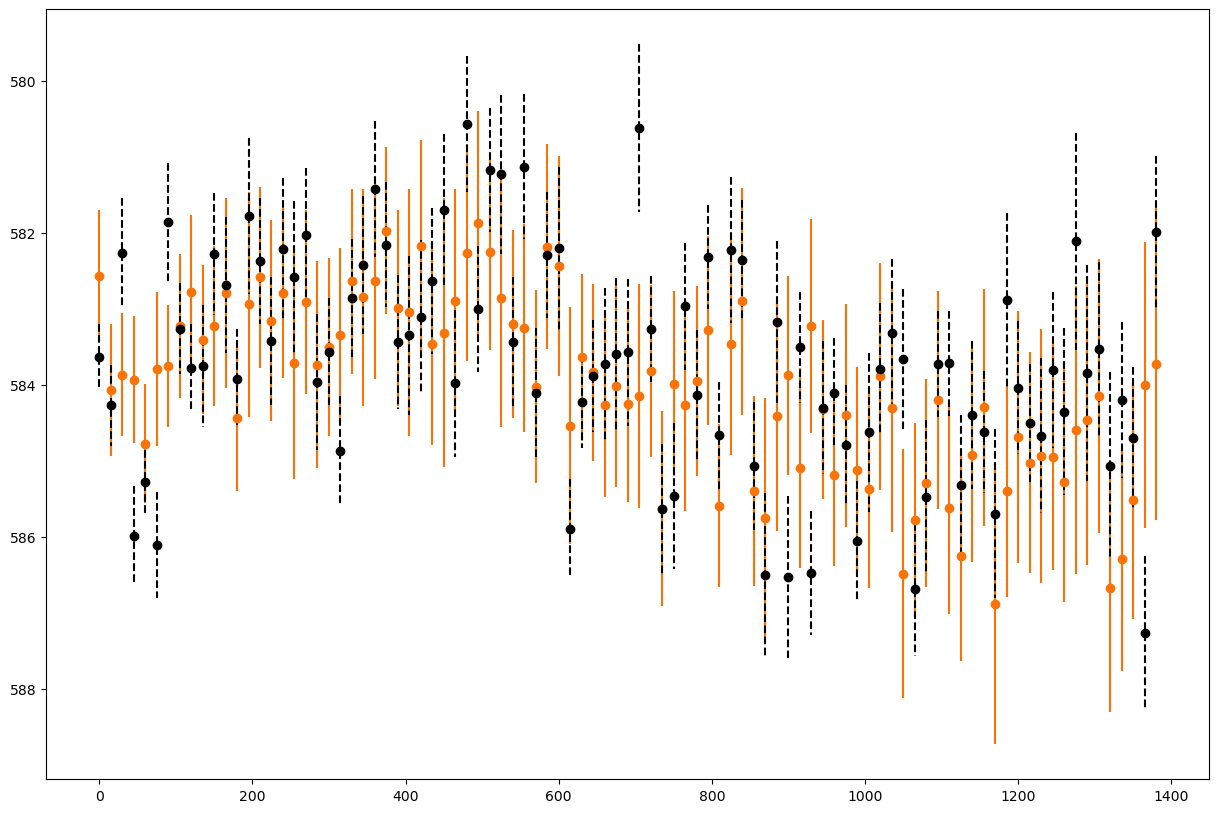

In [25]:
plt.figure(figsize=(15, 10))
plt.errorbar(range(0, LEN*3, 3*5), p1_loc_avg, p1_err_avg, fmt='o', c='xkcd:orange')
e = plt.errorbar(range(0, LEN*3, 3*5), p1_avg_loc, p1_avg_err, fmt='o', c='black')
e[-1][0].set_linestyle('--')
plt.gca().invert_yaxis()

<ErrorbarContainer object of 3 artists>

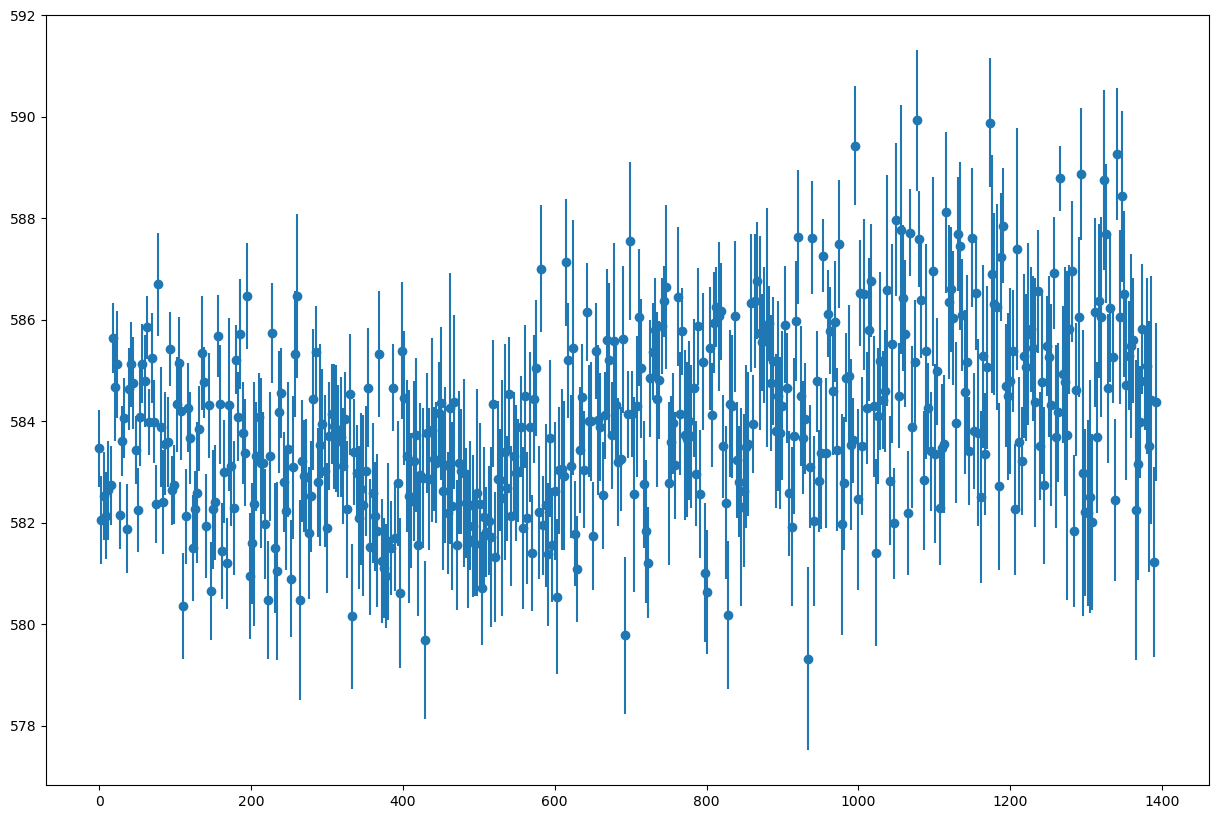

In [26]:
plt.figure(figsize=(15, 10))
plt.errorbar(range(0, LEN*3, 3), p1_loc, p1_err, fmt='o')

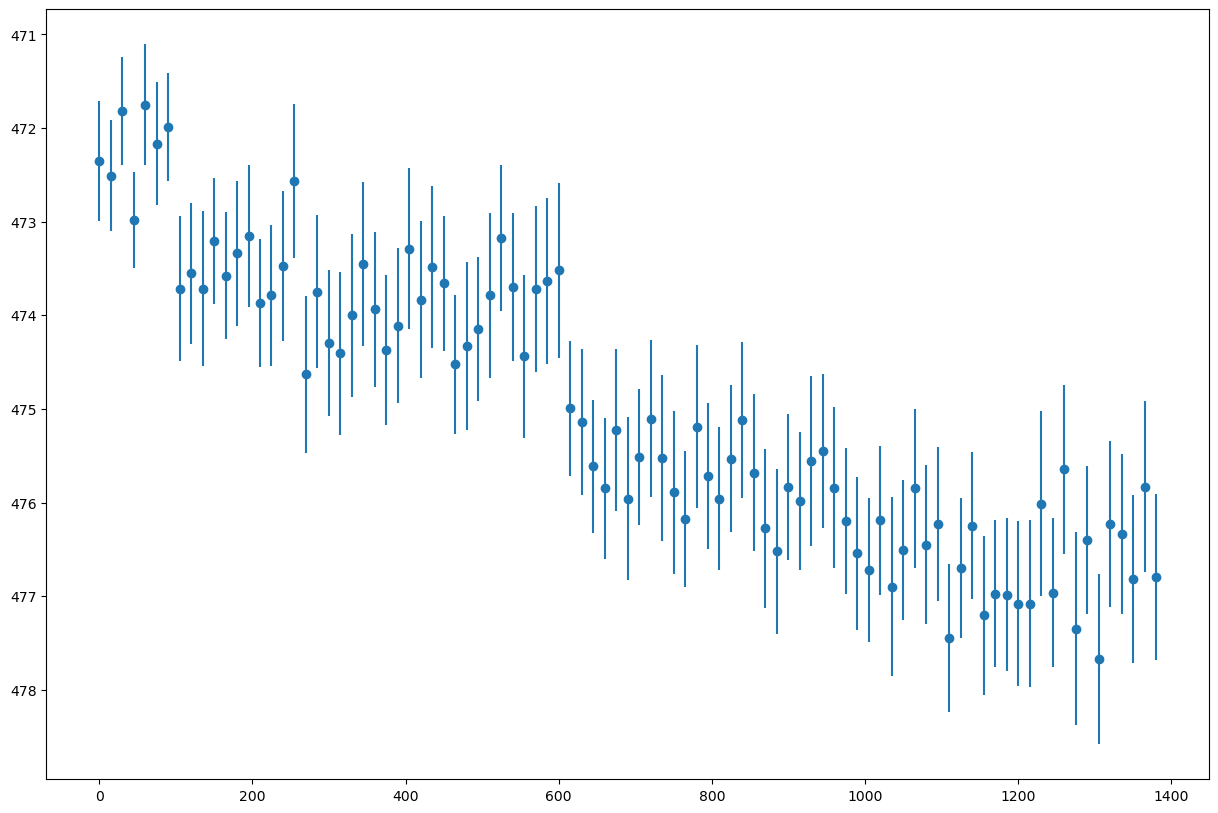

In [27]:
plt.figure(figsize=(15, 10))
plt.errorbar(range(0, LEN*3, 3*5), p2_loc_avg, p2_err_avg, fmt='o')
plt.gca().invert_yaxis()

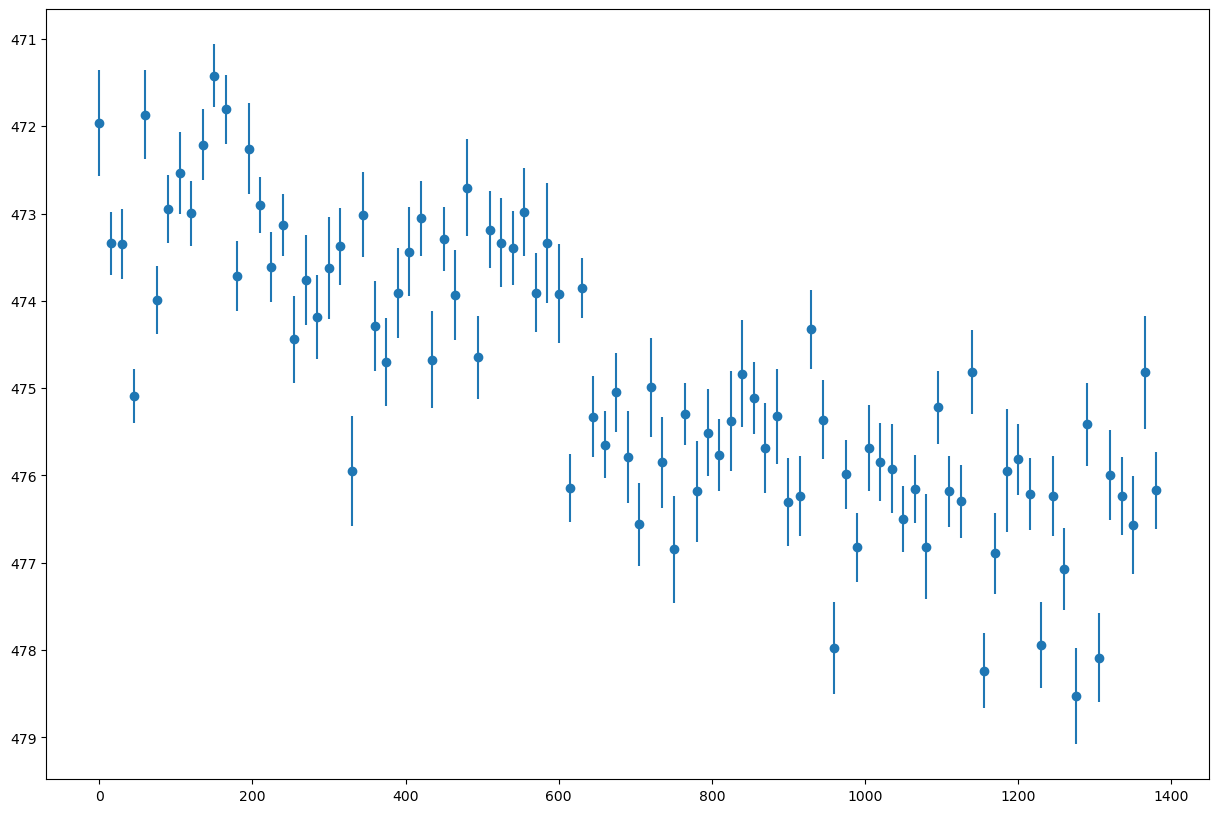

In [28]:
plt.figure(figsize=(15, 10))
plt.errorbar(range(0, LEN*3, 3*5), p2_avg_loc, p2_avg_err, fmt='o')
plt.gca().invert_yaxis()

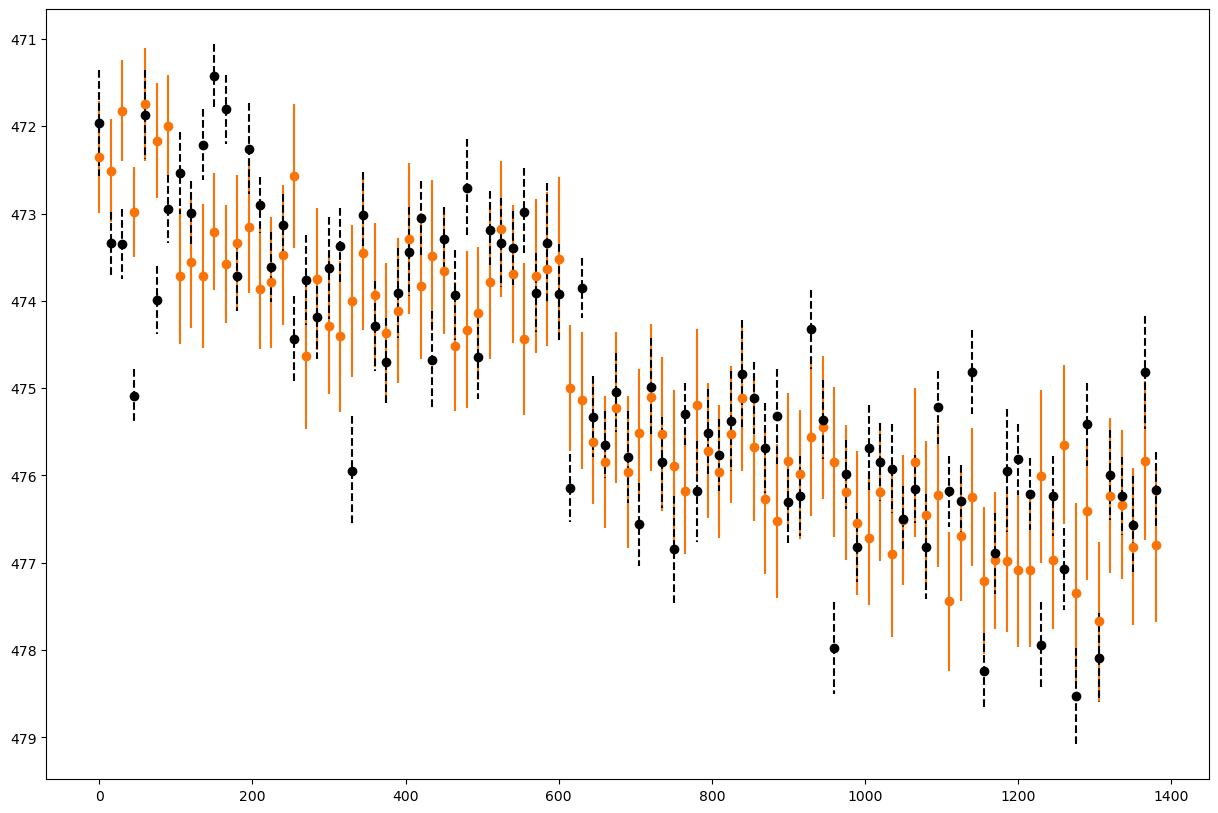

In [29]:
plt.figure(figsize=(15, 10))
plt.errorbar(range(0, LEN*3, 3*5), p2_loc_avg, p2_err_avg, fmt='o', c='xkcd:orange')
e = plt.errorbar(range(0, LEN*3, 3*5), p2_avg_loc, p2_avg_err, fmt='o', c='black')
e[-1][0].set_linestyle('--')
plt.gca().invert_yaxis()

In [163]:
peak_pos(0, HOT_PX, P1_MIN, P1_MAX)

(583.4922275818896, 0.7486352234655327)

In [35]:
f[s-464]

117

In [5]:
signal_loc, f0_s = image_to_spectrum(imread_gs('data/20240314/Im01_2024-03-14-164532-0000.tif'))

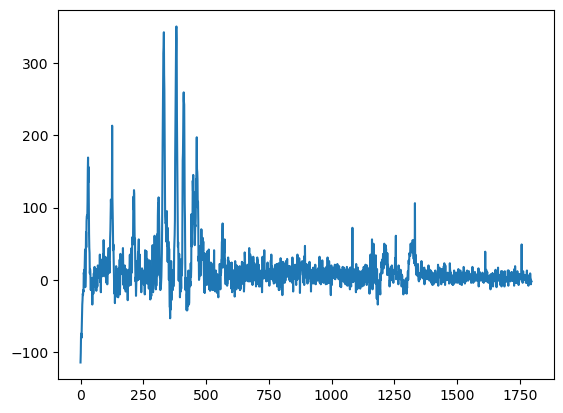

In [8]:
plt.plot(remove_bckg(f0_s, 20, 10, 80))